In [ ]:
!pip install keras
!pip install tensorflow


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from pandas import DatetimeIndex

In [ ]:
# Load the dataset
df = pd.read_csv('AP001.csv')
df.head()




,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,0.48,...,33.43,71.67,2.30,226.33,123.67,NaN,-0.1,0.1,0.0,23.05
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,...,33.70,70.00,2.50,223.00,186.00,NaN,-0.1,0.1,0.0,NaN
2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,0.47,...,33.57,63.50,1.88,223.00,240.50,NaN,-0.1,0.1,0.0,NaN


In [ ]:
# Extract the day from 'From' column
df['From Date'] = pd.to_datetime(df['From Date'])
df['Day'] = df['From Date'].dt.date



In [ ]:
# Extract the day from 'From' column
df['From Date'] = pd.to_datetime(df['From Date'])
df['Day'] = df['From Date'].dt.date

# Group by 'Day' and calculate the mean of numeric columns only
# Select only numeric columns before applying the aggregation
numeric_columns = df.select_dtypes(include=np.number).columns
daily_report = df.groupby('Day')[numeric_columns].agg('mean').reset_index()

# Display the daily report
print(daily_report)



             Day  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0     2016-07-01      12.236667     50.791667   14.444167    38.509167   
1     2016-07-02      22.278000     67.738667   26.850667    46.828667   
2     2016-07-03      14.162500     46.146250   12.116250    41.458750   
3     2016-07-04       5.842105     24.153684    7.357895    39.178947   
4     2016-07-05       4.718750     17.228750   15.559167    39.981667   
...          ...            ...           ...         ...          ...   
2460  2023-03-27      37.593750     61.177083   11.168333    38.981667   
2461  2023-03-28      40.843750     59.895833    7.777917    38.923333   
2462  2023-03-29      40.130435     61.641304    4.961250    32.171250   
2463  2023-03-30      49.364583     72.395833    5.115833    31.208333   
2464  2023-03-31      39.739583     60.291667    6.989167    35.660000   

      NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  ...  \
0     29.557500     7.744167     6

In [ ]:
#remove  outliers
daily_report = daily_report[daily_report['PM2.5 (ug/m3)'] < daily_report\
 ['PM2.5 (ug/m3)'].quantile(0.95)]


IndentationError: unexpected indent (<ipython-input-29-0c521d2c4ca6>, line 4)

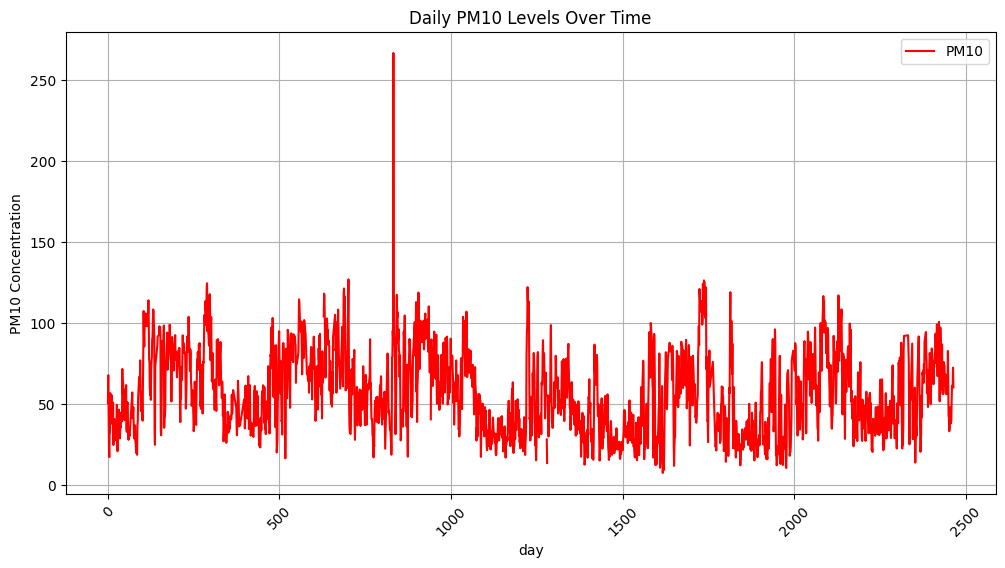

In [ ]:

# Plot PM10 levels over time
plt.figure(figsize=(12, 6))
plt.plot(daily_report.index, daily_report['PM10 (ug/m3)'], label='PM10',\
         color= 'red')
plt.xlabel('day')
plt.ylabel('PM10 Concentration')
plt.title('Daily PM10 Levels Over Time')
plt.legend(markerfirst=True)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


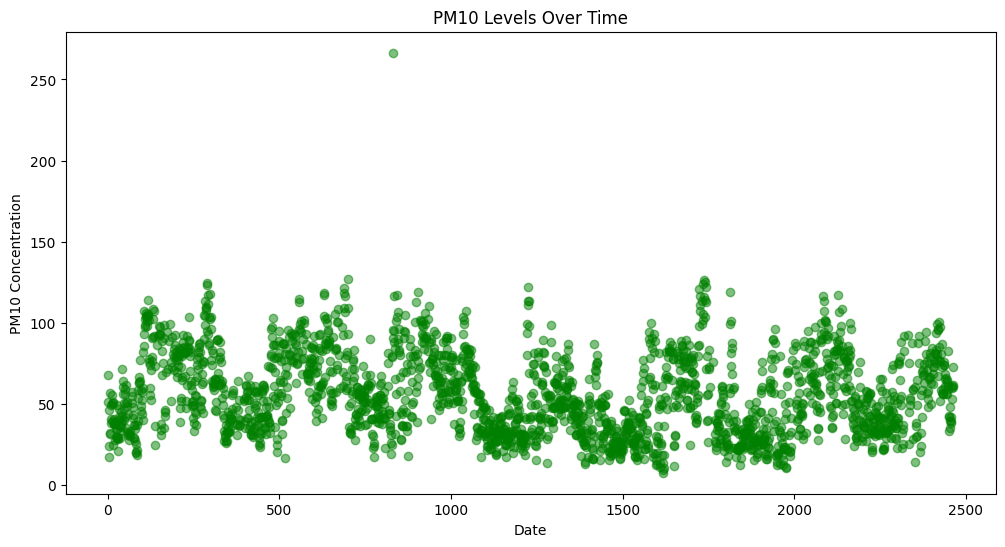

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(daily_report.index, daily_report['PM10 (ug/m3)'], alpha=0.5,\
            color='green')
plt.title('PM10 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.show()


independent feature ki

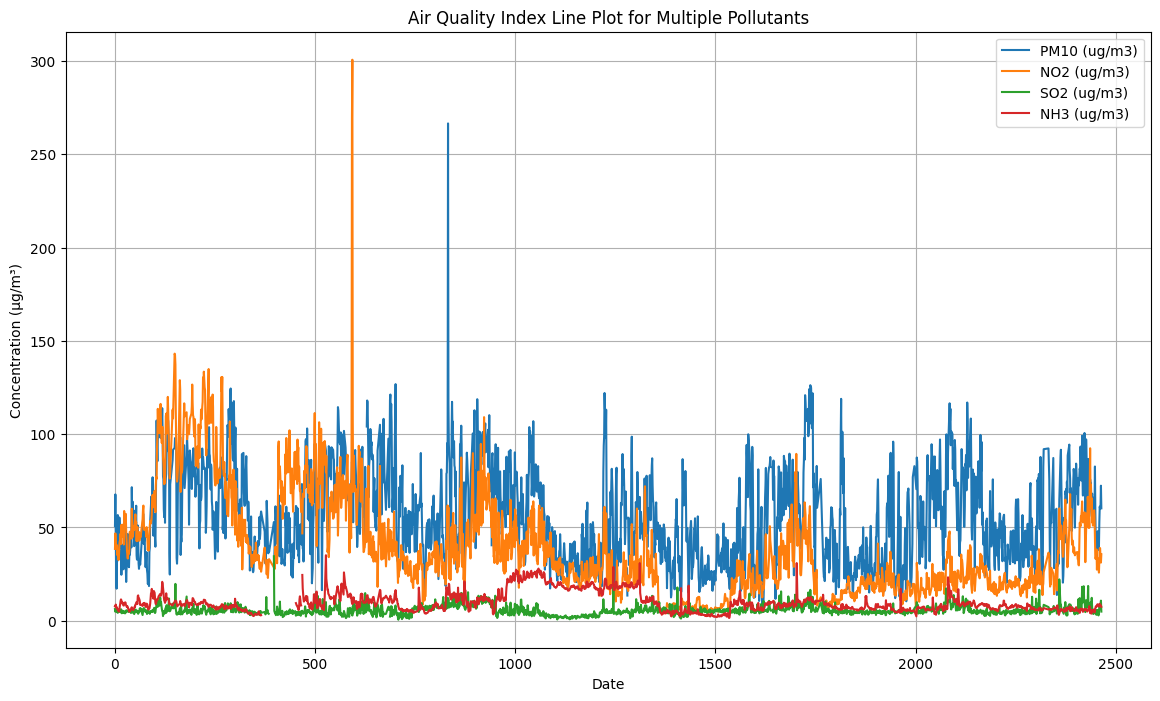

In [ ]:
plt.figure(figsize=(14, 8))
for pollutant in ['PM10 (ug/m3)', 'NO2 (ug/m3)', 'SO2 (ug/m3)', 'NH3 (ug/m3)']:
    plt.plot(daily_report.index, daily_report[pollutant], label=pollutant)

plt.title('Air Quality Index Line Plot for Multiple Pollutants')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


# **preprocessing for Lstm model**

In [ ]:
# use fillna
daily_report.fillna(0, inplace=True)


AttributeError: 'NoneType' object has no attribute 'fillna'

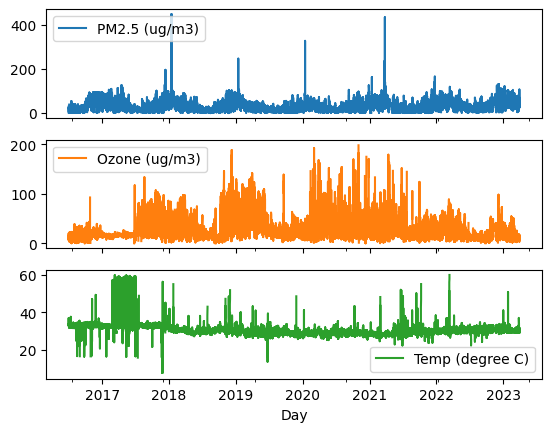

In [ ]:
plot_pol= ['PM2.5 (ug/m3)','Ozone (ug/m3)', 'Temp (degree C)']
plot_features = df[plot_pol]
plot_features.index = df['Day']
_ = plot_features.plot(subplots=True)

In [ ]:
daily_report.describe().transpose()

AttributeError: 'NoneType' object has no attribute 'describe'

In [ ]:
# Use multiple features for the LSTM model
from sklearn.preprocessing import MinMaxScaler
features = [ 'PM2.5 (ug/m3)', 'NO2 (ug/m3)', 'NO (ug/m3)', \
            'SO2 (ug/m3)', 'Ozone (ug/m3)']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_report[features])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Define lookback and forecast periods
lookback = 100
forecast_horizon = 30

# Split data into train and test
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]
# Creating TimeseriesGenerator
train_gen = TimeseriesGenerator(train_data, train_data, length=lookback, batch_size=32)
test_gen = TimeseriesGenerator(test_data, test_data, length=lookback, batch_size=32)


#building the model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(lookback, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


In [ ]:

model.fit(train_gen, epochs=20, validation_data=test_gen)


In [ ]:
# Get the last lookback sequence from the test data
last_sequence = test_data[-lookback:]
last_sequence = last_sequence.reshape((1, lookback, 1))

# Predict the next 30 days
forecast = []
for _ in range(forecast_horizon):
    next_value = model.predict(last_sequence)
    forecast.append(next_value[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], [[next_value]], axis=1)

forecast = np.array(forecast).reshape(-1, 1)
forecast = scaler.inverse_transform(forecast)


In [ ]:
# Evaluate the model on test data
loss, mae = model.evaluate(test_generator)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training vs Validation Loss')
plt.show()


In [ ]:
# Generate predictions
predictions = model.predict(test_generator)

# Rescale predictions and test data to original scale
# The original 'scaled_test' was causing the error:
# scaled_test = np.array([test[i][0] for i in range(len(test_generator))])
# Instead, reshape the 'test' data directly to be 2D
scaled_test = test.reshape(-1, len(features))  # Reshape to match scaler's expectation

y_pred = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(scaled_test)

# Plot predictions vs actual values
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features):
    plt.plot(y_test[:, i], label=f'Actual {feature}')
    plt.plot(y_pred[:, i], linestyle='--', label=f'Predicted {feature}')

plt.title('Predictions vs Actuals')
plt.xlabel('Time Step')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install pmdarima
import pmdarima as pm

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from itertools import product
#plotting the histogram for make sure how the data is...
plt.subplot(212)
plt.hist(daily_report['PM10 (ug/m3)'])
plt.show()


In [ ]:
#adfuller test to generate the critical values
result = adfuller(daily_report['PM10 (ug/m3)'], autolag='AIC')

# Extract and print the test results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' %(key, value))

In [ ]:
#log and differencing the data to become data non-stayionary to stationary
daily_report_log = np.log(daily_report['PM10 (ug/m3)'])
daily_report_diff = daily_report_log.diff() # Use daily_report_log directly
daily_report.dropna(inplace=True)
daily_report.head()

In [ ]:
#log and differencing the data to become data non-stayionary to stationary
daily_report_log = np.log(daily_report['PM10 (ug/m3)'])
daily_report_diff = daily_report_log.diff() # Use daily_report_log directly
# Add the differenced data as a column to the DataFrame
daily_report['daily_report_diff'] = daily_report_diff  # Assign the differenced series to a new column
daily_report.dropna(inplace=True)
daily_report.head()

In [ ]:
plt.plot(daily_report.index,daily_report['daily_report_diff'])
plt.show()

In [ ]:
plot_pacf(daily_report['daily_report_diff'], lags = 40)
plt.show()

In [ ]:
plot_pacf(daily_report['daily_report_diff'], lags = 40)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

def find_best_aic_model(data, max_p, max_d, max_q):
    """
    Finds ARIMA model with lowest AIC using loop.
    """
    best_aic = np.inf
    best_model = None
    best_order = None
    for p, d, q in product(range(max_p + 1), range(max_d + 1), range(max_q + 1)):
        try:
            model = SARIMAX(data, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model_fit
                best_order = (p, d, q)
        except Exception as e:
            continue  # Ignoring errors during fitting the model
    return best_order, best_aic

# Set the maximum values for p, d,and q
max_p = 8
max_d = 1
max_q = 8

# Add the 'daily_report_log' as a column to the DataFrame
daily_report['daily_report_log'] = np.log(daily_report['PM10 (ug/m3)']) #Adding the log transformed data as a column

# Running the grid search on the log data
best_order, best_aic = find_best_aic_model(daily_report['daily_report_log'], max_p, max_d, max_q) # Now using the column in the DataFrame
best_order, best_aic

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting the selected ARIMA(5, 0, 3) model to the log-transformed data
selected_model = SARIMAX(daily_report['daily_report_log'], order=(5, 0, 3), enforce_stationarity=False, enforce_invertibility=False)
selected_model_fit = selected_model.fit(disp=False)

# Displaying the model summary
selected_model_fit.summary()

# Plotting the diagnostics for the selected model
selected_model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [ ]:
# Forecasting the next 24 months
forecast_result = selected_model_fit.get_forecast(steps=24)

# Confidence intervals of the forecasts
forecast_ci = forecast_result.conf_int()

# Taking the exponential to transform back to the original scale
forecast_mean = np.exp(forecast_result.predicted_mean)

# Accessing confidence intervals using the correct column names
# The column names are likely 'lower daily_report_log' and 'upper daily_report_log'
forecast_ci_lower = np.exp(forecast_ci['lower daily_report_log'])
forecast_ci_upper = np.exp(forecast_ci['upper daily_report_log'])

# Creating a DataFrame to hold the forecast and intervals
forecast_df = pd.DataFrame({
    'Forecast': forecast_mean,
    'Lower CI': forecast_ci_lower,
    'Upper CI': forecast_ci_upper
})

forecast_df.reset_index(drop=True, inplace=True)
# Assuming jjson and date column exist. If not, adjust accordingly.
# Assuming 'Day' column in daily_report contains datetime objects
forecast_df.index = pd.date_range(start=daily_report['Day'].iloc[-1] + pd.DateOffset(months=3), periods=24, freq='Q')
forecast_df.head()

In [ ]:
# @title Forecast vs Lower CI

from matplotlib import pyplot as plt
forecast_df.plot(kind='scatter', x='Forecast', y='Lower CI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Producing a forecast for the next 24 months by using get_prediction()
n_forecast = 24
prediction = selected_model_fit.get_prediction(end=selected_model.nobs + n_forecast)
idx = np.arange(len(prediction.predicted_mean))
fig, ax = plt.subplots()
ax.plot(daily_report['daily_report_log'], color='blue', label='Recorded EPS per Share($)')
ax.plot(idx[-n_forecast:], prediction.predicted_mean[-n_forecast:], color='red', label='Forecasted EPS per Share($)')
ax.set(title='Johnson&Johnson Sales Forecast', xlabel='Month Number', ylabel='EPS per Share($)')
ax.legend(loc='upper left', fontsize='small')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example dataset (daily pollutant concentration)
# Replace 'daily_report' with your dataset
features = ['PM10 (ug/m3)', 'PM2.5 (ug/m3)', 'NO2 (ug/m3)', 'SO2 (ug/m3)']
target = 'Ozone (ug/m3)'  # Example target variable

# Prepare the data
X = daily_report[features].values
y = daily_report[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a Gaussian Process kernel (RBF + Constant)
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Create Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)






In [ ]:
# Fit the model
gpr.fit(X_train, y_train)

# Predictions
y_pred, sigma = gpr.predict(X_test, return_std=True)

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange', linestyle='--')
plt.fill_between(
    np.arange(len(y_pred)),
    y_pred - 2 * sigma,
    y_pred + 2 * sigma,
    color='orange',
    alpha=0.2,
    label='Confidence Interval (95%)'
)
plt.title('Gaussian Process Regression: Predicted vs Actual')
plt.xlabel('Test Sample Index')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()